<div align="center">

# Assignment 8

---

**Author:** Matthew Walczyk  
**Date:** 10/14/2024  
**Modified By:** Matthew Walczyk  
**Description:** This program contains my week 6 exercises using pandas matplotlib seaborn and itertools.

---
</div>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import itertools

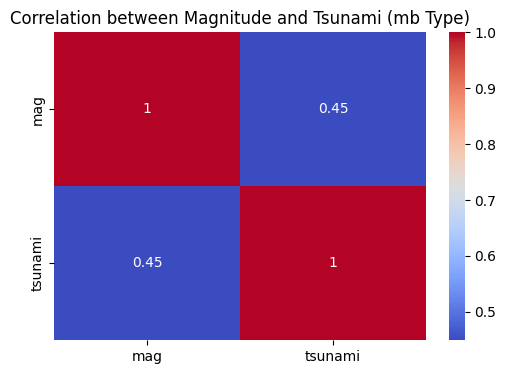

In [4]:
earthquakes = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_06/data/earthquakes.csv')

df_mb = earthquakes[earthquakes['magType'] == 'mb']

# The data seems very imbalanced
correlation_matrix = df_mb[['mag', 'tsunami']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation between Magnitude and Tsunami (mb Type)')
plt.show()

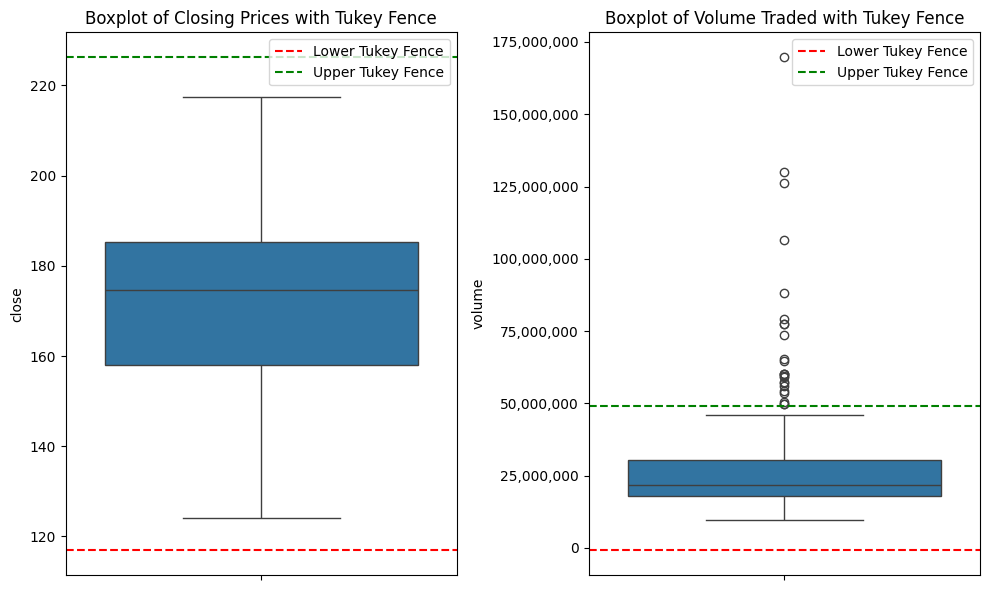

In [12]:
facebook = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_06/data/fb_stock_prices_2018.csv')

# Calculate IQR (Interquartile Range) for 'close' prices
q1_close = facebook['close'].quantile(0.25)
q3_close = facebook['close'].quantile(0.75)
iqr_close = q3_close - q1_close

# Calculate the Tukey Fence bounds for 'close' prices
lower_bound_close = q1_close - 1.5 * iqr_close
upper_bound_close = q3_close + 1.5 * iqr_close

# Calculate IQR for 'volume'
q1_volume = facebook['volume'].quantile(0.25)
q3_volume = facebook['volume'].quantile(0.75)
iqr_volume = q3_volume - q1_volume

# Calculate the Tukey Fence bounds for 'volume'
lower_bound_volume = q1_volume - 1.5 * iqr_volume
upper_bound_volume = q3_volume + 1.5 * iqr_volume

# Create the boxplot for 'volume' and 'close'
plt.figure(figsize=(10, 6))

# Boxplot for 'close' prices
plt.subplot(1, 2, 1)
sns.boxplot(y=facebook['close'])
plt.axhline(y=lower_bound_close, color='r', linestyle='--', label='Lower Tukey Fence')
plt.axhline(y=upper_bound_close, color='g', linestyle='--', label='Upper Tukey Fence')
plt.title('Boxplot of Closing Prices with Tukey Fence')
plt.legend()

# Boxplot for 'volume'
plt.subplot(1, 2, 2)
sns.boxplot(y=facebook['volume'])
plt.axhline(y=lower_bound_volume, color='r', linestyle='--', label='Lower Tukey Fence')
plt.axhline(y=upper_bound_volume, color='g', linestyle='--', label='Upper Tukey Fence')
plt.title('Boxplot of Volume Traded with Tukey Fence')

# Need this so it is not in scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.tight_layout()
plt.show()

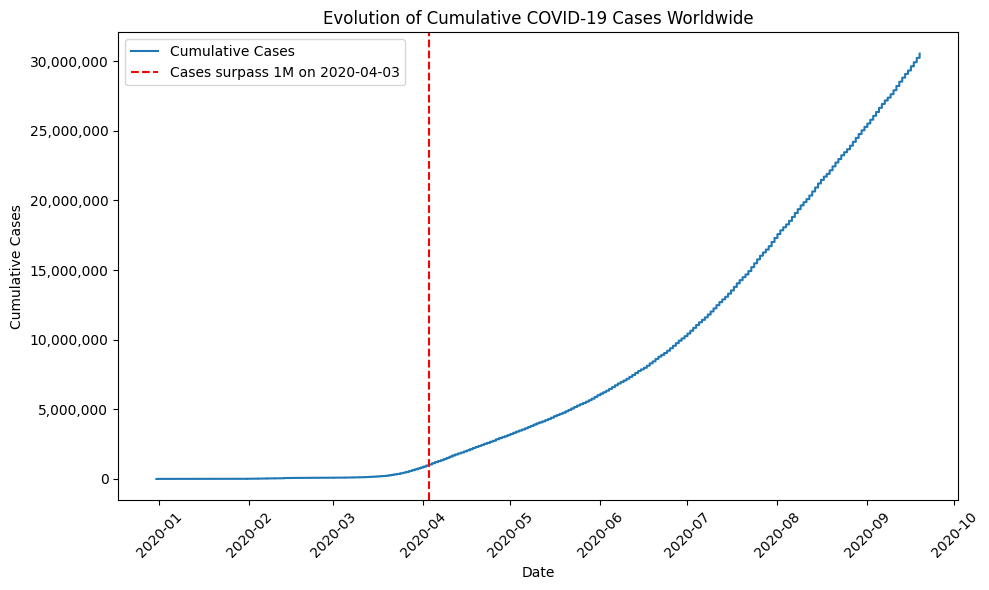

In [14]:
covid = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_06/data/covid19_cases.csv')

covid['dateRep'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

# Sort the data by date
covid = covid.sort_values(by='dateRep')

# Calculate the cumulative sum of cases
covid['cumulative_cases'] = covid['cases'].cumsum()

# Find the date where cumulative cases surpassed 1 million
million_cases_date = covid[covid['cumulative_cases'] > 1000000]['dateRep'].min()

plt.figure(figsize=(10, 6))
plt.plot(covid['dateRep'], covid['cumulative_cases'], label='Cumulative Cases')

# Add a vertical dashed line at the date when cases surpassed 1 million
if pd.notna(million_cases_date):
    plt.axvline(x=million_cases_date, color='r', linestyle='--', label=f'Cases surpass 1M on {million_cases_date.date()}')
    
plt.title('Evolution of Cumulative COVID-19 Cases Worldwide')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()

# Need this so it is not in scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


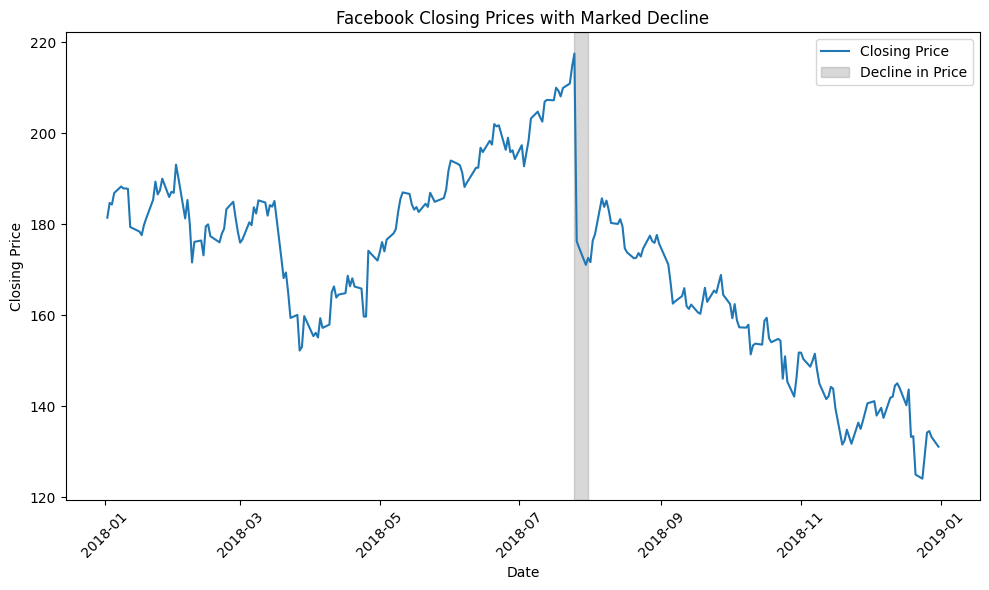

In [18]:
facebook['date'] = pd.to_datetime(facebook['date'], format='%Y-%m-%d')

# Sort the data by date
facebook = facebook.sort_values(by='date')

# Set up the plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=facebook['date'], y=facebook['close'], label='Closing Price')

# Shade the area between the specified dates to mark the decline
plt.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='gray', alpha=0.3, label='Decline in Price')


plt.title('Facebook Closing Prices with Marked Decline')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

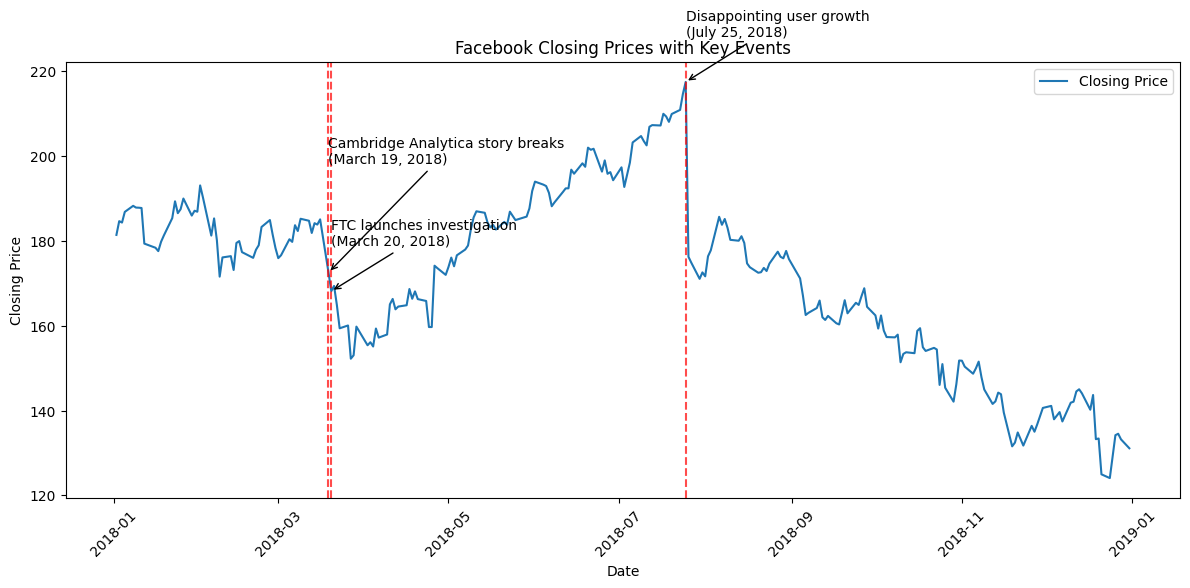

In [21]:
events = {
    'Disappointing user growth\n(July 25, 2018)': '2018-07-25',
    'Cambridge Analytica story breaks\n(March 19, 2018)': '2018-03-19',
    'FTC launches investigation\n(March 20, 2018)': '2018-03-20'
}

# Convert event dates to datetime
events = {key: pd.to_datetime(value) for key, value in events.items()}

# Set up the plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=facebook['date'], y=facebook['close'], label='Closing Price')

# Annotate the events with staggered positions for close dates
for event, date in events.items():
    plt.axvline(x=date, color='r', linestyle='--', alpha=0.7)
    
    # Get the closing price at the event date for annotation position
    close_price = facebook[facebook['date'] == date]['close'].values[0]
    
    # Adjust positions for overlapping annotations
    if event == 'Cambridge Analytica story breaks\n(March 19, 2018)':
        xytext_offset = (date, close_price + 25)  # Move this label higher
    elif event == 'FTC launches investigation\n(March 20, 2018)':
        xytext_offset = (date, close_price + 10)  # Move this label slightly lower
    else:
        xytext_offset = (date, close_price + 10)  # Default offset
    
    # Annotate with arrow
    plt.annotate(
        event,
        xy=(date, close_price),
        xytext=xytext_offset,  # Adjust the vertical position
        arrowprops=dict(facecolor='black', arrowstyle="->"),
        horizontalalignment='left', verticalalignment='bottom',
        fontsize=10
    )

# Labeling the plot
plt.title('Facebook Closing Prices with Key Events')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# The book just said to adjust the function but it doesn't show anything so not sure if more is needed
def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    
    Parameters:
        - data: A `pandas.DataFrame`

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    colormap = plt.colormaps['viridis']
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(colormap.colors[:permutation_count]) 
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes